# 1. Library Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder,PolynomialFeatures
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report
from scipy import stats
import catboost as ctb
import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import LogisticRegression,Ridge,LinearRegression
from sklearn.ensemble import AdaBoostClassifier,HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.experimental import enable_iterative_imputer
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import BaseEstimator, RegressorMixin
from imblearn.under_sampling import TomekLinks
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

import typing

from adjustText import adjust_text
import outset as otst
from outset import patched as otst_patched

# 2. Data Loading

In [2]:
train_data = pd.read_csv('/Users/projects_archieve/loan-prediction/playground-series-s4e10/train.csv')
test_data = pd.read_csv('/Users/projects_archieve/loan-prediction/playground-series-s4e10/test.csv')

original_data =pd.read_csv('/Users/projects_archieve/loan-prediction/credit_risk_dataset.csv')

In [3]:
train_data.head(10)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
5,5,27,45000,RENT,2.0,VENTURE,A,9000,8.94,0.20,N,5,0
6,6,25,45000,MORTGAGE,9.0,EDUCATION,A,12000,6.54,0.27,N,3,0
7,7,21,20000,RENT,0.0,PERSONAL,C,2500,13.49,0.13,Y,3,0
8,8,37,69600,RENT,11.0,EDUCATION,D,5000,14.84,0.07,Y,11,0
9,9,35,110000,MORTGAGE,0.0,DEBTCONSOLIDATION,C,15000,12.98,0.14,Y,6,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [5]:
train_data.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
id,58645.000000,29322.000000,16929.497605,0.000000,14661.000000,29322.000000,43983.000000,58644.000000
person_age,58645.000000,27.550857,6.033216,20.000000,23.000000,26.000000,30.000000,123.000000
person_income,58645.000000,64046.172871,37931.106979,4200.000000,42000.000000,58000.000000,75600.000000,1900000.000000
person_emp_length,58645.000000,4.701015,3.959784,0.000000,2.000000,4.000000,7.000000,123.000000
loan_amnt,58645.000000,9217.556518,5563.807384,500.000000,5000.000000,8000.000000,12000.000000,35000.000000
loan_int_rate,58645.000000,10.677874,3.034697,5.420000,7.880000,10.750000,12.990000,23.220000
loan_percent_income,58645.000000,0.159238,0.091692,0.000000,0.090000,0.140000,0.210000,0.830000
cb_person_cred_hist_length,58645.000000,5.813556,4.029196,2.000000,3.000000,4.000000,8.000000,30.000000
loan_status,58645.000000,0.142382,0.349445,0.000000,0.000000,0.000000,0.000000,1.000000


In [6]:
test_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


In [8]:
test_data.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
id,39098.000000,78193.500000,11286.764749,58645.000000,68419.250000,78193.500000,87967.750000,97742.000000
person_age,39098.000000,27.566781,6.032761,20.000000,23.000000,26.000000,30.000000,94.000000
person_income,39098.000000,64060.460842,37955.828705,4000.000000,42000.000000,58000.000000,75885.000000,1900000.000000
person_emp_length,39098.000000,4.687068,3.868395,0.000000,2.000000,4.000000,7.000000,42.000000
loan_amnt,39098.000000,9251.466188,5576.254680,700.000000,5000.000000,8000.000000,12000.000000,35000.000000
loan_int_rate,39098.000000,10.661216,3.020220,5.420000,7.880000,10.750000,12.990000,22.110000
loan_percent_income,39098.000000,0.159573,0.091633,0.000000,0.090000,0.140000,0.210000,0.730000
cb_person_cred_hist_length,39098.000000,5.830707,4.072157,2.000000,3.000000,4.000000,8.000000,30.000000


In [9]:
original_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [10]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [11]:
original_data.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
person_age,32581.000000,27.734600,6.348078,20.000000,23.000000,26.000000,30.000000,144.000000
person_income,32581.000000,66074.848470,61983.119168,4000.000000,38500.000000,55000.000000,79200.000000,6000000.000000
person_emp_length,31686.000000,4.789686,4.142630,0.000000,2.000000,4.000000,7.000000,123.000000
loan_amnt,32581.000000,9589.371106,6322.086646,500.000000,5000.000000,8000.000000,12200.000000,35000.000000
loan_int_rate,29465.000000,11.011695,3.240459,5.420000,7.900000,10.990000,13.470000,23.220000
loan_status,32581.000000,0.218164,0.413006,0.000000,0.000000,0.000000,0.000000,1.000000
loan_percent_income,32581.000000,0.170203,0.106782,0.000000,0.090000,0.150000,0.230000,0.830000
cb_person_cred_hist_length,32581.000000,5.804211,4.055001,2.000000,3.000000,4.000000,8.000000,30.000000


# 3. EDA

## Target Variable Analysis

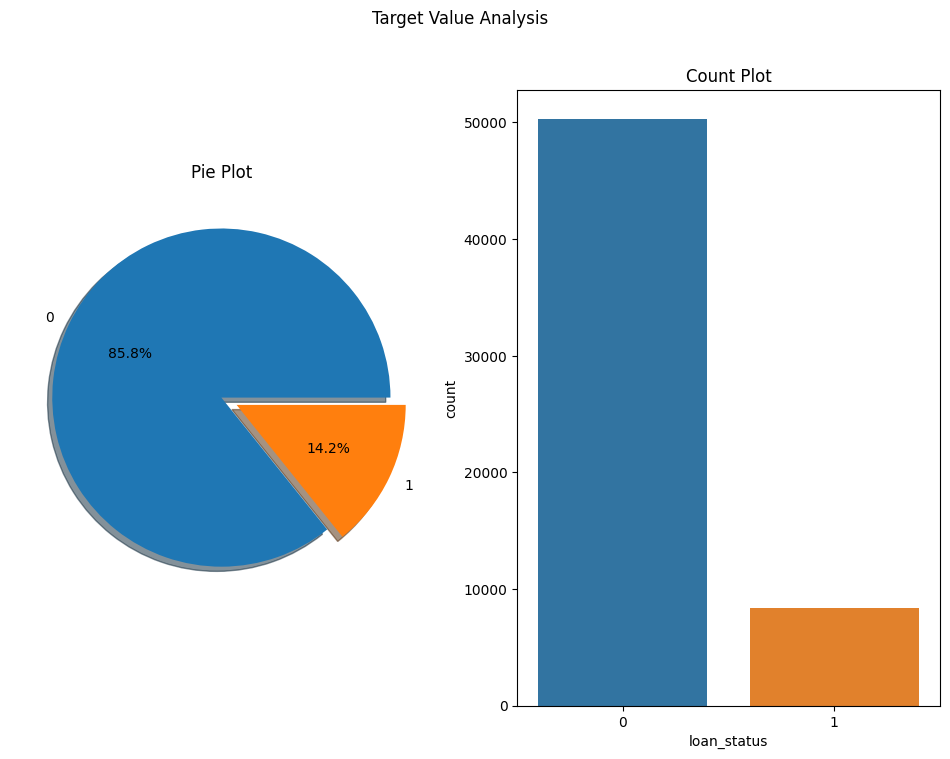

In [12]:
fig, axs = plt.subplots(1,2,figsize=(12,8))

train_data['loan_status'].value_counts().plot.pie(
    autopct="%1.1f%%",
    ax=axs[0],
    shadow  = True,
    colors = ['#1f77b4', '#ff7f0e'],
    explode = (0, 0.1)
)
axs[0].set_ylabel('')
axs[0].set_title('Pie Plot')

sns.countplot(
    x='loan_status',
    data=train_data,
    ax=axs[1],
    palette=['#1f77b4', '#ff7f0e'])
axs[1].set_title('Count Plot')

plt.suptitle('Target Value Analysis')

plt.show()




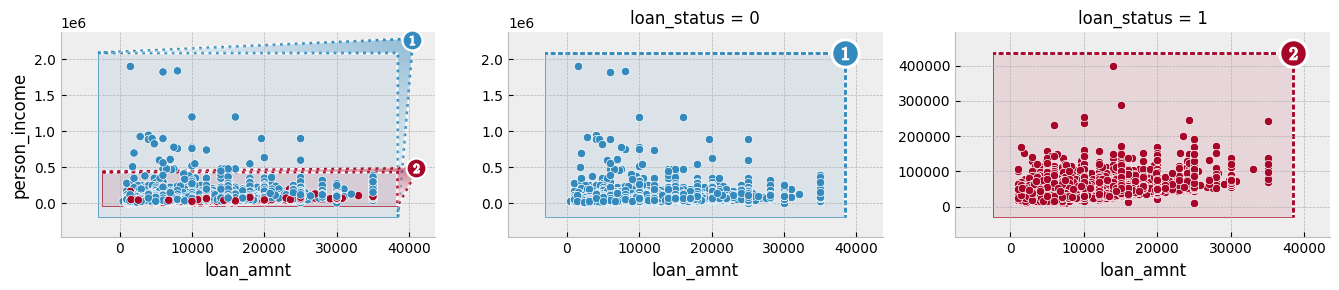

In [13]:
plt.style.use("bmh")  # aesthetics: switch matplotlib style sheet

loan_status = [
    0,
    1,
]

grid = otst.OutsetGrid(  # set up axes grid manager
    train_data,  # only top 8 in each industry
    x="loan_amnt",
    y="person_income",
    col="loan_status",
    hue="loan_status",
    col_order=loan_status,  # subset to our focal industries
    hue_order=loan_status,
    aspect=1.5,  # widen subplots
    col_wrap=3,
)

grid.map_dataframe(  # map scatterplot over all axes
    otst_patched.scatterplot,
    x="loan_amnt",
    y="person_income",
    legend=False,
)
grid.marqueeplot(equalize_aspect=False)
plt.show()

## Categorial Variables Analysis

### 1. Home_ownership

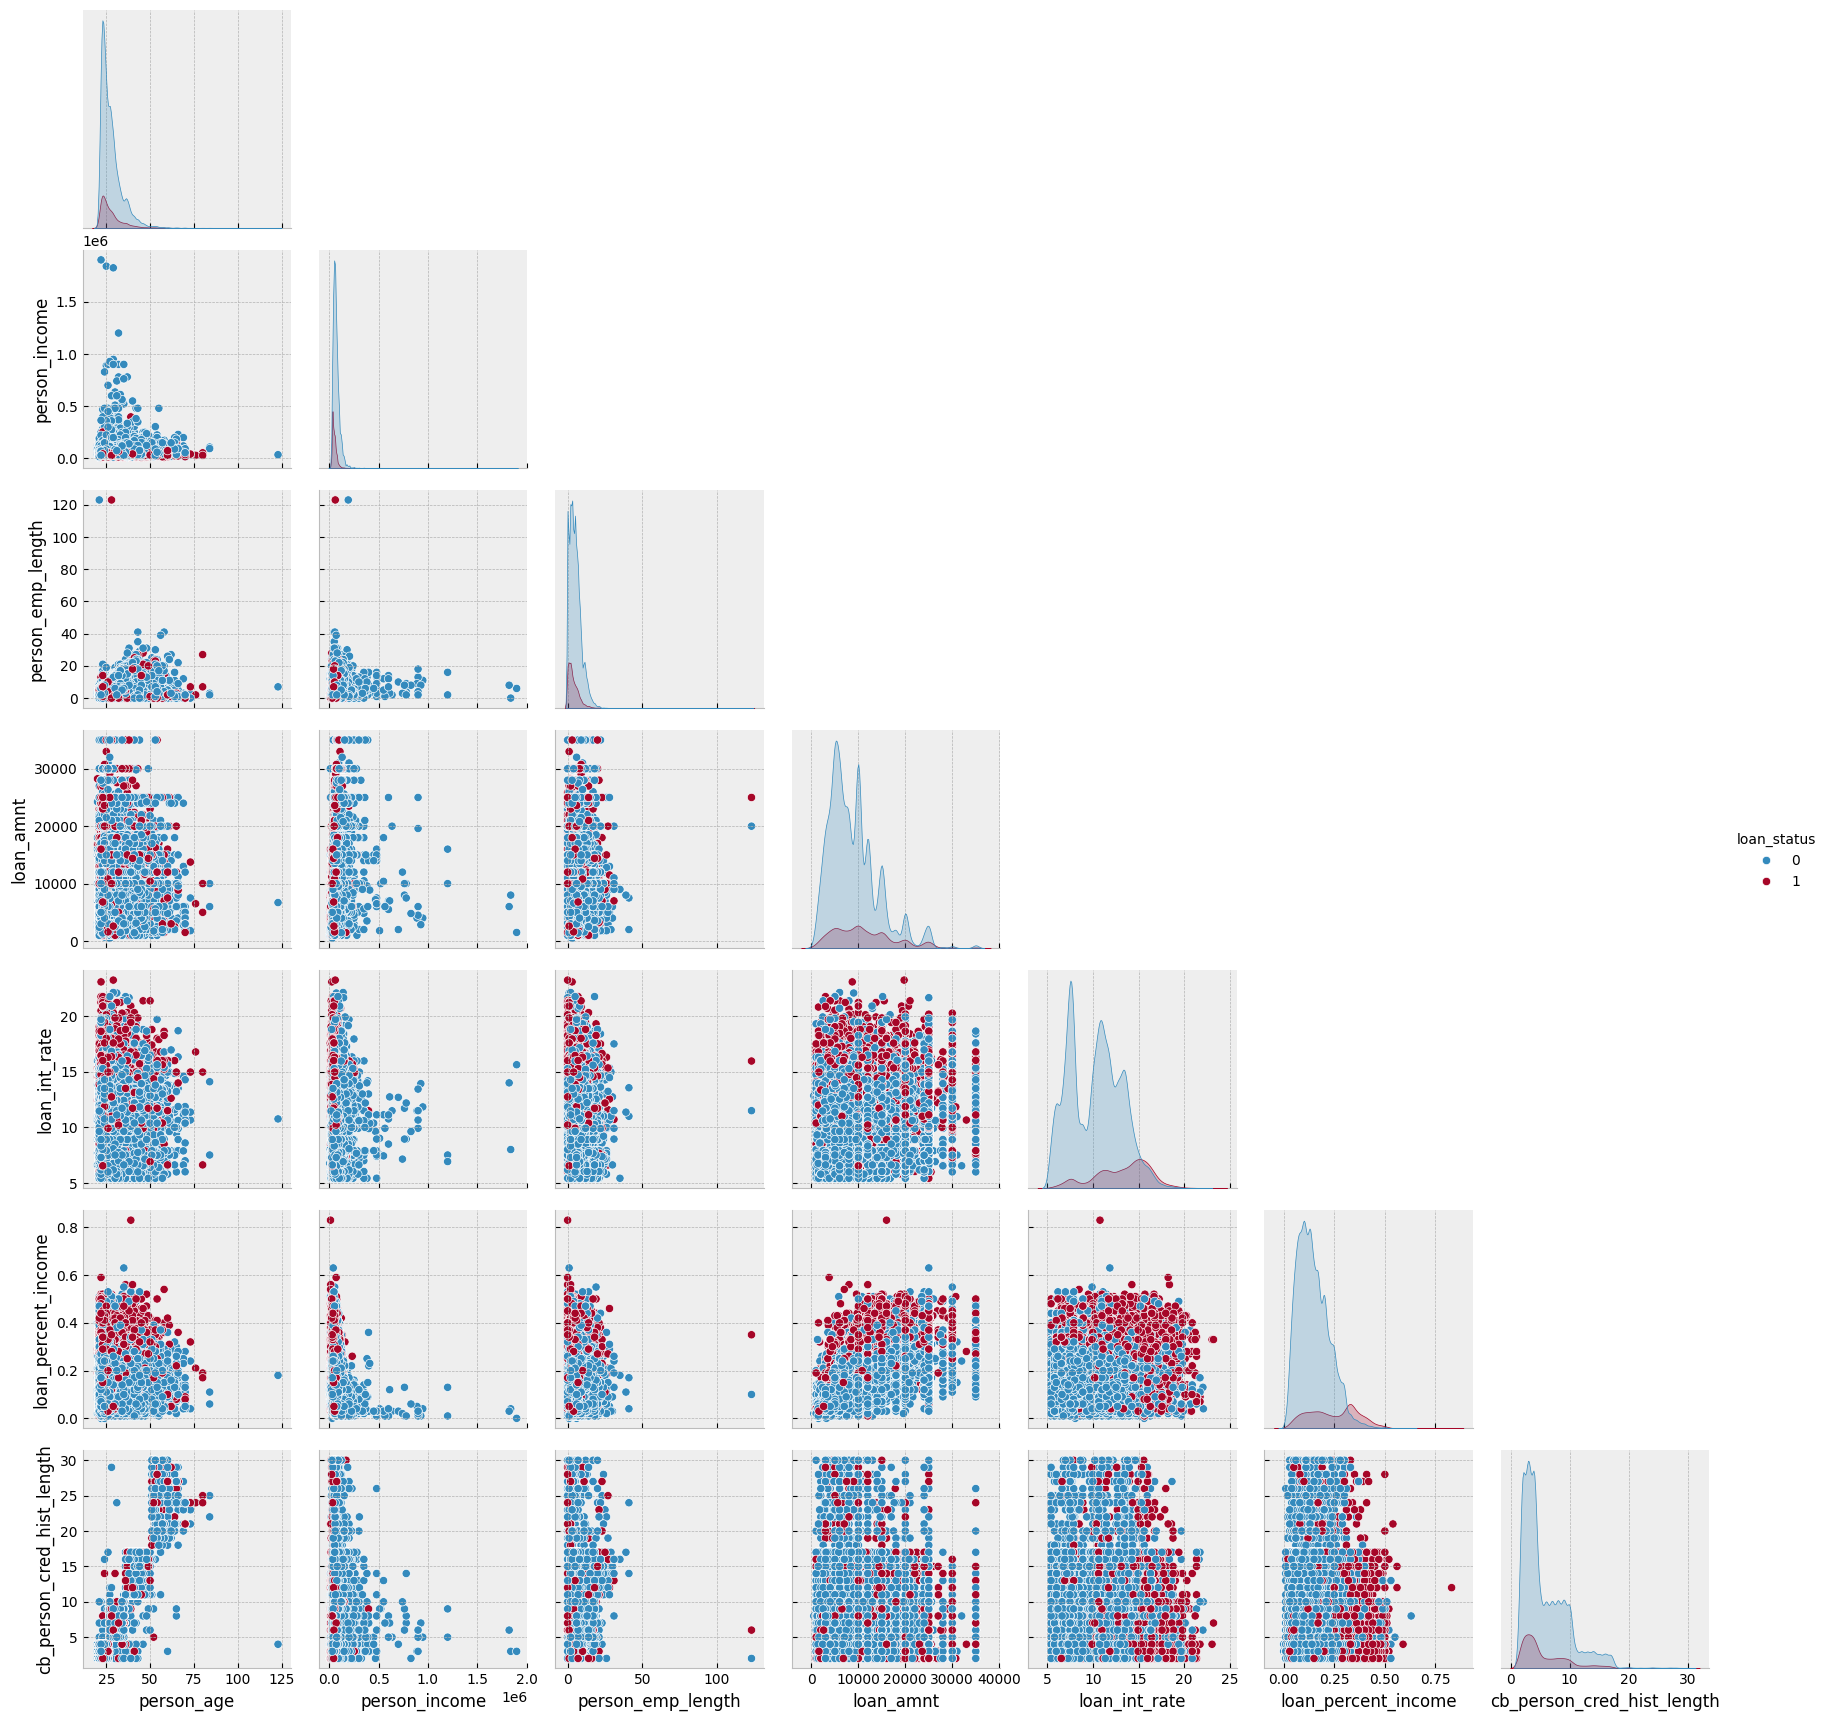

In [14]:
df3 = train_data[['person_age', 
                  'person_income', 
                  'person_emp_length', 
                  'loan_amnt', 
                  'loan_int_rate', 
                  'loan_percent_income', 
                  'cb_person_cred_hist_length', 
                  'loan_status']].copy()

sns.pairplot(df3, hue="loan_status", corner=True)
plt.show()

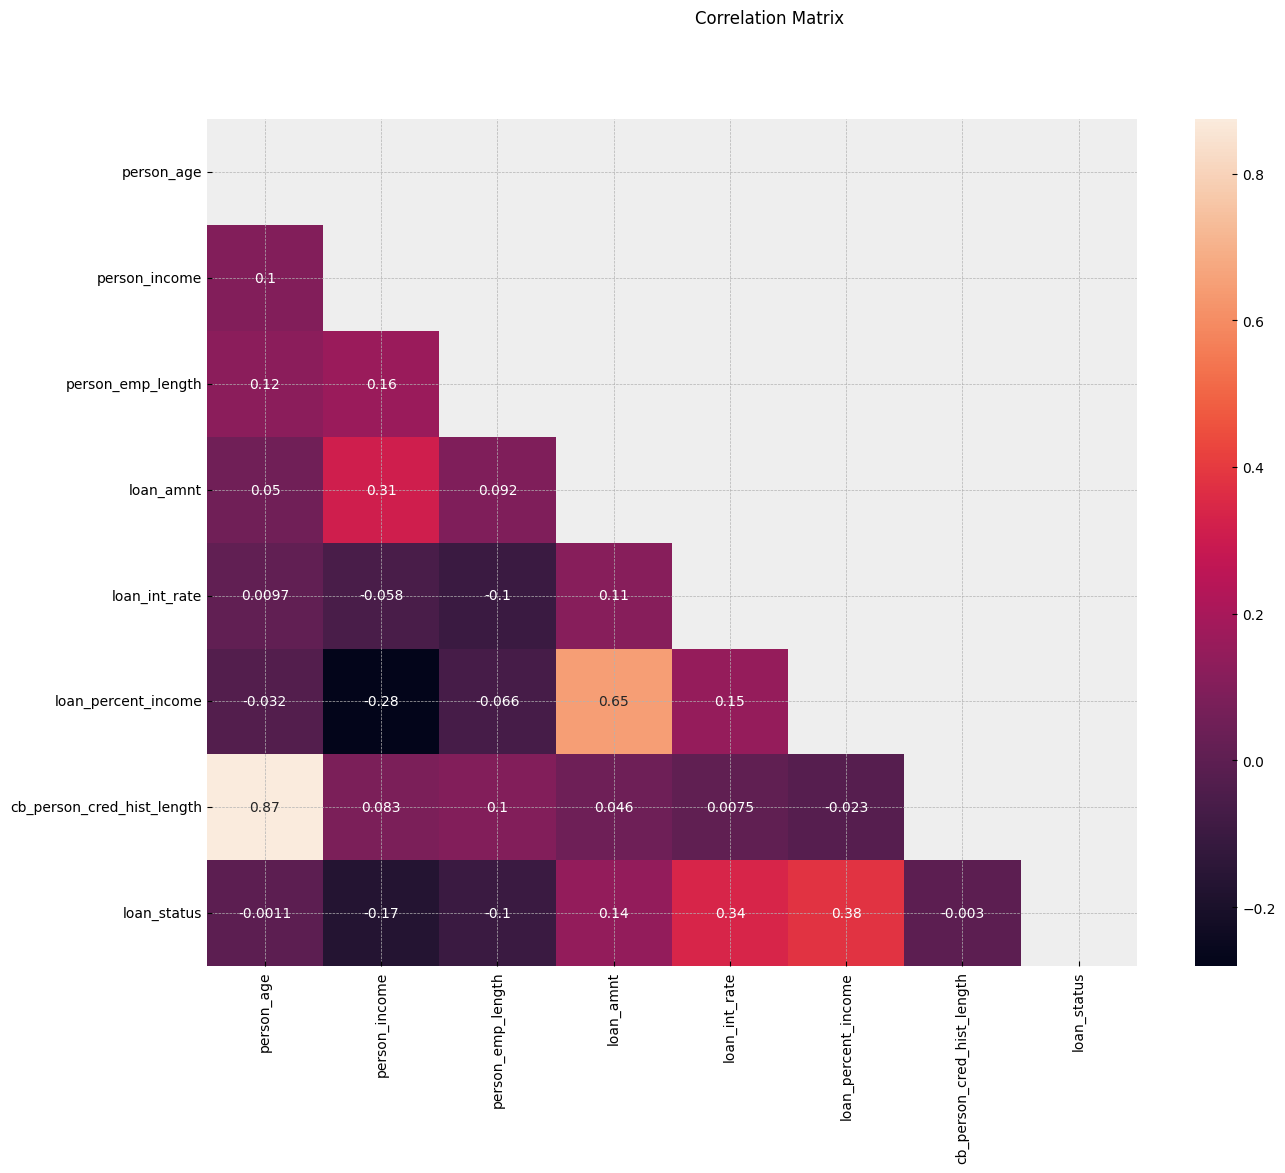

In [15]:
corr_matrix=df3.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

f,ax=plt.subplots(figsize=(15,11))
sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.suptitle('Correlation Matrix')
plt.show()

# 4. Modeling

## 4.1 Data preparation


In [16]:
train= pd.concat([train_data, original_data],axis=0,ignore_index=True)
train.drop('id',axis=1,inplace=True)
test_data.drop('id',axis=1,inplace=True)

In [17]:
cat_cols=['person_home_ownership','loan_intent','cb_person_default_on_file','loan_grade']

In [18]:
train.drop(train[train['person_age']>=100].index,axis=0,inplace=True)
train.drop(train[train['person_emp_length']>=100].index,axis=0,inplace=True)

In [19]:
#imputation for Nan
train['loan_grade1'] = train['loan_grade'].replace({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
imputer =  IterativeImputer(estimator=LinearRegression(), max_iter=500, random_state=0)
X_imputed = imputer.fit_transform(train[["loan_grade1", "loan_int_rate"]])[:,1]
train['loan_int_rate1']=X_imputed
train['loan_int_rate'].fillna(train['loan_int_rate1'],inplace=True)

train['person_emp_length']=train['person_emp_length'].fillna(train['person_emp_length'].mean())
train.drop(['loan_grade1','loan_int_rate1'],axis=1,inplace=True)

In [20]:
y = train['loan_status']
train.drop('loan_status',axis=1,inplace=True)

In [21]:
from imblearn.under_sampling import TomekLinks
def tomek_trim(train,y):
  category_mappings = {}
  train_trim = train.copy()
  for col in cat_cols:
      category_mappings[col] = {v: k for k, v in enumerate(train_trim[col].unique())}
      train_trim[col] = train_trim[col].map(category_mappings[col])

  tl = TomekLinks(sampling_strategy='auto')
  train_trim, y_trim = tl.fit_resample(train_trim, y)
  for col in cat_cols:
    reverse_mapping = {v: k for k, v in category_mappings[col].items()}
    train_trim[col] = train_trim[col].round().map(reverse_mapping)
  return train_trim,y_trim

In [22]:
feature = train.columns.to_list()
print(feature)

['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']


## 4.2 feature engineering

Create new features and prepare data for CatBoost:
1. Calculate loan income error
2. Convert numeric features to categorical type
3. Handle special encoding for CatBoost model

In [23]:
def feature_eng(train,test):
    df = train.copy()
    df_test = test_data.copy()
    df['loan_income_err'] = (df['loan_amnt']/df['person_income']).round(3)-df['loan_percent_income']
    df_test['loan_income_err'] = (df_test['loan_amnt']/df_test['person_income']).round(3)-df_test['loan_percent_income']
    return df,df_test

In [24]:
def cat_boost_encoding(train):
    train_enc = train.copy()
    train_enc['person_age'] = train_enc['person_age'].astype(int).astype('string')
    train_enc['person_emp_length'] = (train_enc['person_emp_length']).fillna(0).astype('int').astype('string')
    train_enc['person_income'] = train_enc['person_income'].astype('int').astype('string')
    train_enc['loan_int_rate'] = train_enc['loan_int_rate'].fillna(0).astype('string')
    train_enc['loan_percent_income'] = (train_enc['loan_percent_income']).astype('string')
    if 'loan_income_err' in train_enc.columns.to_list():
        train_enc['loan_income_err'] = (train_enc['loan_income_err']*1000).astype(int).astype('string')
    train_enc['cb_person_cred_hist_length']= train_enc['cb_person_cred_hist_length'].astype('string')
    for col in train_enc.columns.to_list():
        train_enc[col]=train_enc[col].astype('category')
    return train_enc

In [25]:
train_fe,test_fe = feature_eng(train,test_data)
train_cat=cat_boost_encoding(train_fe)
test_cat=cat_boost_encoding(test_fe)

In [26]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()

## 4.3 Model Training setup

Set up cross-validation training with:
- 10-fold stratified cross-validation
- TomekLinks for handling imbalanced data
- CatBoost classifier with custom parameters

In [27]:
class cv_trainer():
    def __init__(self,model,train_data,target_data,test_data,n_split,model_type ,cat_ft = None):
        self.cat_ft=cat_ft
        self.model=model
        self.train=train_data
        self.target =target_data
        self.test = test_data
        self.n_split=n_split
        self.model_Type=model_type
    def cv(self):
        fold = StratifiedKFold(n_splits=self.n_split,shuffle=True,random_state=42)
        oof_pred = np.zeros(len(self.train))
        test_pred = np.zeros(len(self.test))
        score= []
        for idx_train, idx_val in fold.split(self.train, self.target):
            X_train, X_val = self.train.iloc[idx_train], self.train.iloc[idx_val]
            y_train, y_val = self.target.iloc[idx_train], self.target.iloc[idx_val]
            model = clone(self.model)
            trimmed_train, trimmed_y = tomek_trim(X_train,y_train)
            model.fit(trimmed_train, trimmed_y, eval_set=[(X_val, y_val)],verbose=False)
            oof_pred[idx_val] =  model.predict_proba(X_val)[:,1]
            test_pred += model.predict_proba(self.test)[:,1]/self.n_split
            fold_scores = roc_auc_score(y_val,oof_pred[idx_val])
            print(f"Fold AUC: {fold_scores}")
            score.append(fold_scores)
        score = roc_auc_score(self.target,oof_pred)
        print(f"mean auc: {score}")
        return oof_pred,test_pred,score

CatBoost model parameters:
- iterations: 3000 trees
- depth: 7 (tree depth)
- learning rate: 0.3
- L2 regularization: 40.0
- Early stopping after 300 rounds
- Scale positive class weight: 2.5

In [28]:
cat_params = {
    'iterations': 3000,
    'depth': 7,
    'eta': 0.3,
    'reg_lambda': 40.0,
    'loss_function': 'Logloss',
    'eval_metric': 'AUC',
    'min_data_in_leaf': 51,
    'early_stopping_rounds': 300,
    'cat_features' : train_cat.columns.to_list(),
    'task_type':'CPU',
    'verbose':200,
    'scale_pos_weight' :2.5,
    'use_best_model': True,
}
model_cat = ctb.CatBoostClassifier(**cat_params,random_state=42)
cat_cv = cv_trainer(model_cat,train_cat,y,test_cat,n_split=10,model_type = 'catboost')
oof_pred_cat,test_pred_cat,auc_cat=cat_cv.cv()

Fold AUC: 0.9687076947560964
Fold AUC: 0.9675443218934717
Fold AUC: 0.9680511310313362
Fold AUC: 0.9685711738983731
Fold AUC: 0.966707181799678
Fold AUC: 0.9667154635527732
Fold AUC: 0.9682192616438215
Fold AUC: 0.9685716775509785
Fold AUC: 0.9638920214747303
Fold AUC: 0.965436073035954
mean auc: 0.9671136084980684


## 4.4 prediction and submission

Generate predictions and create submission file:
1. Use trained model to make predictions on test data
2. Create submission DataFrame with ID and predictions
3. Save predictions to CSV file

In [29]:
sample =pd.read_csv('/Users/projects_archieve/loan-prediction/playground-series-s4e10/sample_submission.csv')

In [30]:
fin_pred=pd.DataFrame()
fin_pred['id']=sample['id']
fin_pred['loan_status']=test_pred_cat
fin_pred.to_csv('submission.csv',index=False)